In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('constants/aerodynamic.csv')
df = df.filter(items=["M","D","A","Cya","Cy", "Cx", "mz", "Cxa"])
df.head(21)


,M,D,A,Cya,Cy,Cx,mz,Cxa
0,0.6,-30,-40,-3.249,-6.075,2.185,-65.159,5.811
1,0.6,-30,-36,-2.793,-5.082,2.243,-61.430,5.022
2,0.6,-30,-32,-2.480,-4.356,2.292,-57.651,4.454
3,0.6,-30,-28,-2.233,-3.768,2.330,-53.847,4.008
4,0.6,-30,-24,-2.024,-3.266,2.358,-50.027,3.640
5,0.6,-30,-20,-1.849,-2.831,2.374,-46.197,3.331
6,0.6,-30,-16,-1.687,-2.437,2.379,-42.359,3.063
7,0.6,-30,-12,-1.542,-2.081,2.374,-38.513,2.831
8,0.6,-30,-8,-1.411,-1.756,2.357,-34.660,2.628
9,0.6,-30,-4,-1.293,-1.459,2.331,-30.801,2.450


In [11]:
df_D_20 = df[df['D'] == -20]
df_D_10 = df[df['D'] == -10]
df_D0 = df[df['D'] == 0]
df_D10 = df[df['D'] == 10]
df_D20 = df[df['D'] == 20]
M = df['M'].drop_duplicates().to_numpy()
A = df['A'].drop_duplicates().to_numpy()

Cya = np.zeros((5,len(M),len(A)))
Cy = np.zeros((5,len(M),len(A)))
Cx = np.zeros((5,len(M),len(A)))
mz = np.zeros((5,len(M),len(A)))
Cxa = np.zeros((5,len(M),len(A)))
for i in range(len(M)):
    for j in range(len(A)):     
        Cya[0][i][j], Cy[0][i][j], Cx[0][i][j], mz[0][i][j], Cxa[0][i][j] = df_D_20.query('M == {0} & A == {1} '.format(M[i], A[j])).values.tolist()[0][3:]
        Cya[1][i][j], Cy[1][i][j], Cx[1][i][j], mz[1][i][j], Cxa[1][i][j] = df_D_10.query('M == {0} & A == {1} '.format(M[i], A[j])).values.tolist()[0][3:]
        Cya[2][i][j], Cy[2][i][j], Cx[2][i][j], mz[2][i][j], Cxa[2][i][j] = df_D0.query('M == {0} & A == {1} '.format(M[i], A[j])).values.tolist()[0][3:]
        Cya[3][i][j], Cy[3][i][j], Cx[3][i][j], mz[3][i][j], Cxa[3][i][j] = df_D10.query('M == {0} & A == {1} '.format(M[i], A[j])).values.tolist()[0][3:]
        Cya[4][i][j], Cy[4][i][j], Cx[4][i][j], mz[4][i][j], Cxa[4][i][j] = df_D20.query('M == {0} & A == {1} '.format(M[i], A[j])).values.tolist()[0][3:]


In [43]:
A

array([-40, -36, -32, -28, -24, -20, -16, -12,  -8,  -4,   0,   4,   8,
        12,  16,  20,  24,  28,  32,  36,  40], dtype=int64)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

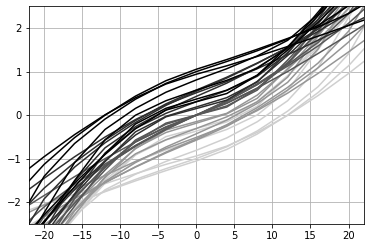

In [12]:
%matplotlib widget

colors = [
    '#cfcfcf',
    '#969696',
    '#575757',
    '#2e2e2e',
    '#000000'
]
for i in range(5):
    for cya in Cya[i]:
        plt.plot(A, cya, color=colors[i])
plt.grid()
plt.ylim(-2.5, 2.5)
plt.xlim(-22, 22)
plt.show()

In [13]:
%matplotlib widget

for i in range(5):
    for cy in Cy[i]:
        plt.plot(A, cy, color=colors[i])
plt.grid()
plt.ylim(-2.5, 2.5)
plt.xlim(-22, 22)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [36]:
%matplotlib widget

for i in range(1):
    for cx in Cx[i]:
        plt.plot(A, cx, color=colors[i])
plt.grid()
plt.xlim(-22, 22)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [15]:
%matplotlib widget

for i in range(5):
    for cxa in Cxa[i]:
        plt.plot(A, cxa, color=colors[i])
plt.grid()
plt.xlim(-22, 22)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [28]:
%matplotlib widget

for i in range(5):
    for mzz in mz[i]:
        plt.plot(A, mzz, color=colors[i])
plt.ylim(-1.0, 1.0)
plt.xlim(-22, 22)
plt.grid()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [40]:
from missile import Missile
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
m = Missile.get_needle()

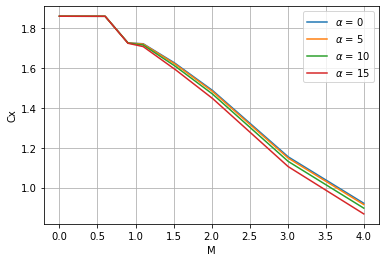

In [31]:
for alpha in [0,5,10,15]:
    machs = np.linspace(0, 4, 1000)
    cxs = [m.Cx_itr(alpha, mach) for mach in machs]
    plt.plot(machs, cxs, label=f'$\\alpha$ = {alpha}')
plt.xlabel('M')
plt.ylabel('Cx')
plt.legend()
plt.grid()
plt.show()

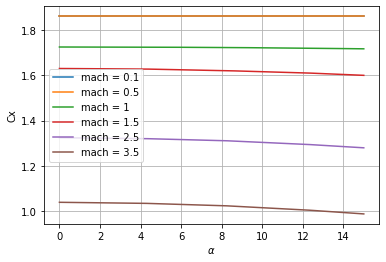

In [35]:
for mach in [0.1, 0.5, 1 ,1.5, 2.5, 3.5]:
    alphas = np.linspace(0, 15, 1000)
    cxs = [m.Cx_itr(alpha, mach) for alpha in alphas]
    plt.plot(alphas, cxs, label=f'mach = {mach}')
plt.xlabel('$\\alpha$')
plt.ylabel('Cx')
plt.legend()
plt.grid()
plt.show()

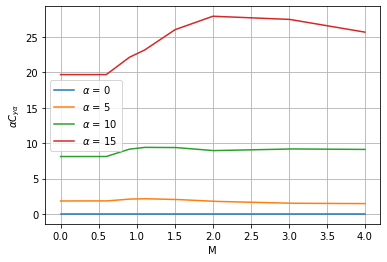

In [32]:
for alpha in [0,5,10,15]:
    machs = np.linspace(0, 4, 1000)
    cys = [alpha*m.Cya_itr(alpha, mach) for mach in machs]
    plt.plot(machs, cys, label=f'$\\alpha$ = {alpha}')
plt.xlabel('M')
plt.ylabel('$\\alpha C_{y\\alpha}$')
plt.legend()
plt.grid()
plt.show()

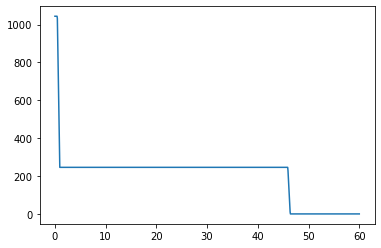

In [41]:
ts = np.linspace(0,60, 1000)
ps = [m.P_itr(t) for t in ts]
plt.plot(ts, ps)
plt.show()